In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
from scipy.optimize import curve_fit

In [3]:
def readFile(filename):
    timeTickFirst, timeTickLast, x, ion3, ion3_raw, ion3_bottom, ion3_top, ion4, ion4_raw, ion4_bottom, \
    ion4_top, ion5, ion5_raw, ion5_bottom, ion5_top, ion2, ion2_raw, ion2_bottom, ion2_top, ion6, \
    ion6_raw, ion6_bottom, ion6_top\
      = np.loadtxt(filename, comments='#', delimiter='\t', converters=None, 
                   skiprows=0,unpack=True, encoding='latin1')
    return x, ion4

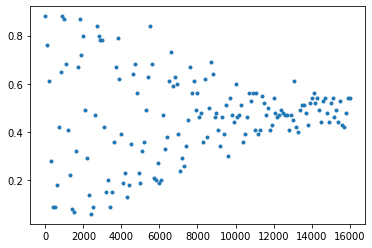

In [8]:
time, ramsey = readFile('ramsey_counter_prop_rfsoc_ms_blue_003')
plt.plot(time, ramsey, '.')

In [40]:
def func(x, tau, T, theta, A, B):
    return A*np.exp(-x/tau)*np.cos(np.pi/2/T*x+theta)+B

In [58]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [59]:
def FitRamsey(xdata, ydata, guess):
    popt, pcov = curve_fit(func, xdata, ydata, guess, sigma=np.sqrt(ydata*(1-ydata)/100),\
                          bounds = ([0,0,-np.pi,0,0],[2e4,10000,np.pi,0.5,1.0]))
    plt.figure(figsize=(10,6))
    plt.plot(xdata, func(xdata, *popt), 'b-', label='fit: tau=%5.3f,' % popt[0])
    plt.errorbar(xdata, ydata, yerr=np.sqrt(ydata*(1-ydata)/100),\
                 ls='', marker='o',mec='firebrick', ecolor='firebrick',mfc='pink')
    plt.legend()
    plt.xlabel('Wait time (us)')
    plt.ylabel('Population')
    print(popt)
    print('sigma_tau = ', np.sqrt(np.diag(pcov)[0]))
    return popt, np.sqrt(np.diag(pcov)[0])

[ 5.18289268e+03  2.35675536e+02 -5.91750359e-02  5.00000000e-01
  4.51697337e-01]
sigma_tau =  675.9467915020246


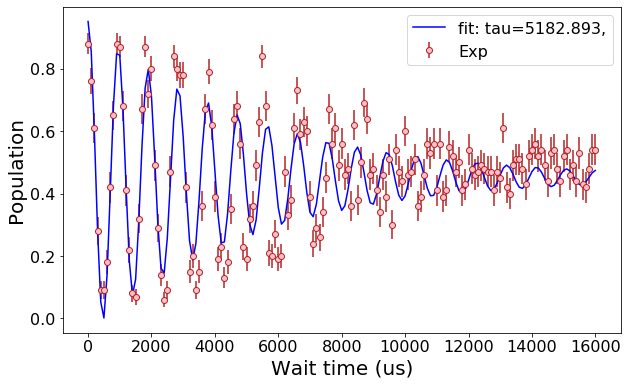

In [60]:
xdata = time
ydata = ramsey
guess = np.array([8000.0, 250, 0.01*np.pi, 0.5, 0.45])
popt, sigma_tau = FitRamsey(xdata, ydata, guess)